# Import Python libraries and directory of results

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.api as sm
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
#from ITS_lib.ITS_functions import ITS_plot, ITS_subplots

D:\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#from google.colab import drive
#drive.mount("/content/drive")

#!pip install pingouin

#!pip install statannotations
#!pip install statsmodels
#!pip install scikit_posthocs

In [3]:
from pathlib import Path

#DATA = Path("/content/drive/My Drive/BBL/GP_ITS")
DATA = Path("C:/Users/Teo/Downloads")

# Create one table with ITS results

In [4]:
ITS = pd.read_csv(DATA / 'result_gp_SBP.txt', sep = '\t', header = None)
ITS.columns = ['Filename','Thickness', 'Porosity', 'BMD', 'TMD']
ITS['ID'] = ITS['Filename'].astype(str).str.split('_').str[0]
ITS['Location'] = ITS['Filename'].astype(str).str.split('_').str[1]
ITS['Subregion'] = ITS['Filename'].astype(str).str.split('_').str[2]
ITS['Location_Subregion'] = ITS['Location'] + '_' + ITS['Subregion']
ITS.head()

,Filename,Thickness,Porosity,BMD,TMD,ID,Location,Subregion,Location_Subregion
0,E0016652_LF_LAT,0.2738,0.247248,912.694346,1204.382048,E0016652,LF,LAT,LF_LAT
1,E0016652_LF_MED,0.2681,0.277952,851.170837,1169.341802,E0016652,LF,MED,LF_MED
2,E0016652_LT_LAT,0.2994,0.222734,960.661315,1228.887595,E0016652,LT,LAT,LT_LAT
3,E0016652_LT_MED,0.2483,NaN,NaN,NaN,E0016652,LT,MED,LT_MED
4,E0016652_RF_LAT,0.2419,0.268690,NaN,NaN,E0016652,RF,LAT,RF_LAT


In [5]:
GP_ID = pd.read_csv(DATA /'GP_fileID.txt', header = None, sep = '\t')
GP_ID.columns = ['GP','Month', 'ID','Location']

In [6]:
ITS_merge = pd.merge(ITS, GP_ID, left_on = 'ID', right_on = 'ID')
ITS_merge.head()

,Filename,Thickness,Porosity,BMD,TMD,ID,Location_x,Subregion,Location_Subregion,GP,Month,Location_y
0,E0016652_LF_LAT,0.2738,0.247248,912.694346,1204.382048,E0016652,LF,LAT,LF_LAT,GP_7,2,NaN
1,E0016652_LF_MED,0.2681,0.277952,851.170837,1169.341802,E0016652,LF,MED,LF_MED,GP_7,2,NaN
2,E0016652_LT_LAT,0.2994,0.222734,960.661315,1228.887595,E0016652,LT,LAT,LT_LAT,GP_7,2,NaN
3,E0016652_LT_MED,0.2483,NaN,NaN,NaN,E0016652,LT,MED,LT_MED,GP_7,2,NaN
4,E0016652_RF_LAT,0.2419,0.268690,NaN,NaN,E0016652,RF,LAT,RF_LAT,GP_7,2,NaN


In [7]:
ITS_merge.groupby(['Location_Subregion', 'Month']).mean()

Thickness  Porosity          BMD          TMD
Location_Subregion Month                                               
LF_LAT             2       0.266145  0.275675   823.453702  1124.407974
                   3       0.287967  0.211046   993.909296  1253.015733
                   4       0.347550  0.184015  1132.464239  1383.358182
                   5       0.275050  0.103039  1324.735082  1473.945180
LF_MED             2       0.282300  0.292938   833.721245  1162.377933
                   3       0.287067  0.180583   883.256820  1124.104523
                   4       0.353550  0.179539  1147.514730  1393.719824
                   5       0.290450  0.097333  1398.093187  1546.581979
LT_LAT             2       0.308255  0.239635   909.274533  1185.980461
                   3       0.235567  0.154852  1025.628437  1222.771436
                   4       0.380500  0.175445  1154.200807  1394.527765
                   5       0.304900  0.115898  1304.789483  1472.315018
LT_MED             2       0.297973  0.258058   876.798035  1181.378433
                   3       0.283467  0.189155  1033.386736  1267.645174
                   4       0.357250  0.160727  1211.349797  1439.181396
                   5       0.287150  0.095742  1383.216336  1527.071228
RF_LAT             2       0.251936  0.296954   773.696067  1089.743722
                   3       0.251367  0.193447  1045.654178  1287.220767
                   4       0.339800  0.168467  1135.656931  1360.648594
                   5       0.271400  0.111125  1300.396390  1459.853232
RF_MED             2       0.274420  0.280117   815.035929  1120.516029
                   3       0.304700  0.203616  1038.034778  1292.163986
                   4       0.374050  0.156514  1183.693916  1398.793816
                   5       0.309600  0.100816  1356.459470  1506.192839
RT_LAT             2       0.281318  0.226489   915.097345  1174.288989
                   3       0.327967  0.211709  1023.390635  1290.957021
                   4       0.370250  0.168602  1159.617186  1389.790769
                   5       0.290100  0.099662  1338.681742  1484.008517
RT_MED             2       0.281509  0.217204   947.084672  1209.504298
                   3       0.259567  0.185874  1065.553073  1302.223998
                   4       0.388350  0.134739  1246.285734  1436.963693
                   5       0.290300  0.123886  1279.359851  1455.846823

In [8]:
ITS_merge.groupby(['Location_Subregion', 'Month']).std()

Thickness  Porosity         BMD         TMD
Location_Subregion Month                                             
LF_LAT             2       0.034182  0.050084   93.520025   67.707986
                   3       0.040500  0.014388   78.046979   92.162697
                   4       0.026234  0.042132   23.555138   41.288068
                   5       0.016476  0.032547   54.017100    7.632356
LF_MED             2       0.042649  0.048191  136.197698  122.585885
                   3       0.028671  0.054415         NaN         NaN
                   4       0.032173  0.055120   63.488922   14.595371
                   5       0.039810  0.007431   74.466243   95.024524
LT_LAT             2       0.070859  0.045788  109.781753   73.279607
                   3       0.069115  0.013704         NaN         NaN
                   4       0.004101  0.063923   87.881989    0.381597
                   5       0.067741  0.013330   53.367657   38.535765
LT_MED             2       0.045516  0.115182  170.462911   66.016691
                   3       0.057135  0.050009  109.042994   86.591762
                   4       0.018738  0.037048   30.775115   25.773411
                   5       0.050558  0.001158   13.488823   16.841716
RF_LAT             2       0.043161  0.059159  106.053327   69.737607
                   3       0.028971  0.039769  141.528885  121.377874
                   4       0.049073  0.056233   77.517704    2.873521
                   5       0.020223  0.013875   23.917064    4.504242
RF_MED             2       0.044694  0.044618   78.466760   49.178951
                   3       0.061803  0.062257  180.170715  127.147366
                   4       0.010960  0.027052   35.560788    1.912464
                   5       0.013294  0.027436   16.423929   26.938617
RT_LAT             2       0.047823  0.046074   80.809072   49.626016
                   3       0.071799  0.025489   74.250092   70.141090
                   4       0.057064  0.000317   42.155327   51.225271
                   5       0.052184  0.013684   35.332068   17.063134
RT_MED             2       0.063928  0.048310   81.311707   52.508850
                   3       0.045449  0.041974   81.120887   40.439040
                   4       0.099490  0.031065   22.486286   24.719238
                   5       0.036487  0.033266   90.739331   49.228294

### Add code to save merged dataframe and can start with that

## Filter by individual GP

In [ ]:
def label_cohort (row):
   if row['GP'] == 'GP_10':
      return 5
   if row['GP'] == 'GP_11':
      return 5
   if row['GP'] == 'GP_12':
      return 5
   if row['GP'] == 'GP_13':
      return 4
   if row['GP'] == 'GP_14':
      return 4
   if row['GP'] == 'GP_15':
      return 4
   if row['GP'] == 'GP_8':
      return 3
   if row['GP'] == 'GP_9':
      return 3
   if row['GP'] == 'GP_16':
      return 3
   if row['GP'] == 'GP_17':
      return 3
   return 0

In [ ]:
ITS_merge['Cohort'] = ITS_merge.apply(lambda row: label_cohort(row), axis=1)

In [ ]:
ITS_merge['GP_Location_Subregion'] = ITS_merge['GP'] + '_' + ITS_merge['Location_Subregion']

In [ ]:
ITS_erode_RT_MED = ITS_merge[(ITS_merge.Location_Subregion == "RT_MED")]

In [ ]:
ITS_erode_RT_MED.groupby(['GP', 'Month']).mean()

In [ ]:
ITS_erode_RT_MED.groupby(['Cohort', 'Month']).mean()

In [ ]:
import scipy.stats as stats

stats.f_oneway(ITS_erode_RT_MED['BV_TV'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['BV_TV'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['BV_TV'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['PR_ratio'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['PR_ratio'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['PR_ratio'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['PR_num_ratio'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['PR_num_ratio'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['PR_num_ratio'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['pBV_TV'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['pBV_TV'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['pBV_TV'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['rBV_TV'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['rBV_TV'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['rBV_TV'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['pTb_N'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['pTb_N'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['pTb_N'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['rTb_N'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['rTb_N'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['rTb_N'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['pTb_Th'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['pTb_Th'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['pTb_Th'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['rTb_Th'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['rTb_Th'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['rTb_Th'][ITS_erode_RT_MED['Cohort'] == 5])

# Cartilage thickness

In [ ]:
GP_measurements = pd.read_csv(DATA /'gp_measurements.txt', header = None, sep = '\t')
GP_measurements.columns = ['GP','Sample','ID']

In [ ]:
GP_cartilage_thickness= pd.read_csv(DATA /'gp_cartilage_thickness.txt', header = None, sep = '\t')
GP_cartilage_thickness.columns = ['Sample','Cart_LAT_thickness','Cart_MED_thickness']

In [ ]:
GP_merge = pd.merge(GP_cartilage_thickness, GP_measurements, left_on = 'Sample', right_on = 'Sample')
GP_merge.head()

In [ ]:
ITS_erode_merge = pd.merge(ITS_erode_merge, GP_merge, left_on = 'ID', right_on = 'ID')
ITS_erode_merge.head()

In [ ]:
ITS_erode_merge.to_csv(DATA /'GP_right.txt', sep = '\t')

In [ ]:
ax = sns.barplot(data = ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness', hue='Month', estimator=np.mean, ci = 68, capsize=.2)
ax.legend_.remove()
pairs=[('RF_LAT', 'RF_MED'), ('RF_LAT', 'RT_LAT'), ('RF_LAT', 'RT_MED'),('RF_MED',  'RT_LAT'), ('RF_MED', 'RT_MED'), ('RT_LAT', 'RT_MED')]

annotator = Annotator(ax, pairs, data=ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness')
annotator.configure(test='t-test_paired', text_format='star', loc='outside')
#annotator.apply_and_annotate()

# Statistical Analysis

In [ ]:
print(pg.normality(ITS_erode_merge))

## Longitudinal Analyses

In [ ]:
ITS_erode_merge.rm_anova(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='sidak', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='BH', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='bonferroni', data = ITS_erode_merge)
post_hocs

## Cross-sectional Analyses

In [ ]:
PR_model = ols('PR_ratio ~ C(Location_Subregion) + C(Month) + C(Location_Subregion):C(Month)', data=ITS_erode_merge).fit()

sm.stats.anova_lm(PR_model,typ=2)

In [ ]:
sp.posthoc_ttest(ITS_erode_merge, val_col='PR_Ratio', group_col='Month', p_adjust='holm')

# Plot ITS results - line graphs


In [ ]:
plt.style.use('seaborn-bright')
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 20}) 
import numpy as np

In [ ]:
ITS_erode_RT_MED["Month"] = ITS_erode_RT_MED["Month"].astype(str)

#hue_order = list(['3', '4', '5'])
#order = ["RF_LAT", "RF_MED", "RT_LAT","RT_MED"]
#order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_erode_RT_MED,
    'x': 'Month',
  #  "order": order,
    "hue": "GP_Location_Subregion",
    #"hue_order": "RT_MED"
    #"hue_order": order
}

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='PR_ratio')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='BV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_N')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_Th')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pTb_Th')

# Plot ITS results bar graphs


In [9]:
#plt.style.use('seaborn-muted')
#plt.style.use('dark_background')
plt.style.use('seaborn-bright')
#plt.style.use('grayscale')
#plt.style.use('seaborn-Greys')

In [10]:
#plt.rcParams["figure.figsize"] = (5.5, 4)
plt.rcParams["figure.figsize"] = (16.5,6.2)
#plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams.update({'font.size': 20}) # 'font.weight' : 'bold', 'axes.labelweight': 'bold'})

In [11]:
import numpy as np

In [21]:
ITS_merge["Month"] = ITS_merge["Month"].astype(str)

hue_order = list(['2', '3', '4', '5'])
order = ["RF_LAT", "RF_MED", "RT_LAT","RT_MED"]
#order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_merge,
    'x': 'Location_Subregion',
    "order": order,
    "hue": "Month",
    "hue_order": hue_order
}

In [22]:
import seaborn as sns

def ITS_plot(ITS_param):
    ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='white') 
    #,fill=False)
    ax = sns.stripplot(**hue_plot_params, y=ITS_param, color='white', dodge=True)
    
    #ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='black') #,fill=False)
    #ax = sns.swarmplot(**hue_plot_params, y=ITS_param, color='black', dodge=True)
    
    ax.set(xlabel = 'Location')
    ax.set(ylabel = '')
    ax.set(title = ITS_param)

    ax.legend_.remove()
    #ax.legend(loc='upper center',ncol=4)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    #annotator = Annotator(ax, pairs, **hue_plot_params, y=ITS_param,show_non_significant=False)
    #annotator.configure(test='t-test_ind', comparisons_correction='BH', correction_format="replace", text_format='star', color='white', loc='inside',pvalue_thresholds=[[1e-4, "*"], [1e-3, "*"], [1e-2, "*"], [0.05, "*"],[1, ""]])
    #annotator.apply_and_annotate()
 
    img_name = str(DATA) + "/ITS_" + ITS_param + ".png"
    plt.tight_layout()

    plt.savefig(img_name, bbox_inches = "tight")


In [28]:
def ITS_subplots(ITS_param1, ITS_param2, ITS_param3, ITS_param4):
    plt.subplot(1,4,1)
    ITS_plot(ITS_param1)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,4,2)
    ITS_plot(ITS_param2)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,4,3)
    ITS_plot(ITS_param3)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,4,4)
    ITS_plot(ITS_param4)
    plt.xticks(rotation=45, ha='right')
    
    img_name = str(DATA) + "/ITS_subplots.png"
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig(img_name) #, bbox_inches = "tight")	

In [29]:
ITS_merge.to_csv(DATA/'SBP_merge.csv',index=False)

In [30]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')]]

In [26]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')],
       [('LF_LAT','2'), ('LF_LAT','3')], [('LF_LAT','2'), ('LF_LAT','4')], [('LF_LAT','2'), ('LF_LAT','5')],[('LF_LAT','3'), ('LF_LAT','4')],[('LF_LAT','3'), ('LF_LAT','5')],[('LF_LAT','4'), ('LF_LAT','5')],
       [('LF_MED','2'), ('LF_MED','3')], [('LF_MED','2'), ('LF_MED','4')], [('LF_MED','2'), ('LF_MED','5')],[('LF_MED','3'), ('LF_MED','4')],[('LF_MED','3'), ('LF_MED','5')],[('LF_MED','4'), ('LF_MED','5')],
       [('LT_LAT','2'), ('LT_LAT','3')], [('LT_LAT','2'), ('LT_LAT','4')], [('LT_LAT','2'), ('LT_LAT','5')],[('LT_LAT','3'), ('LT_LAT','4')],[('LT_LAT','3'), ('LT_LAT','5')],[('LT_LAT','4'), ('LT_LAT','5')],
       [('LT_MED','2'), ('LT_MED','3')], [('LT_MED','2'), ('LT_MED','4')], [('LT_MED','2'), ('LT_MED','5')],[('LT_MED','3'), ('LT_MED','4')],[('LT_MED','3'), ('LT_MED','5')],[('LT_MED','4'), ('LT_MED','5')]]

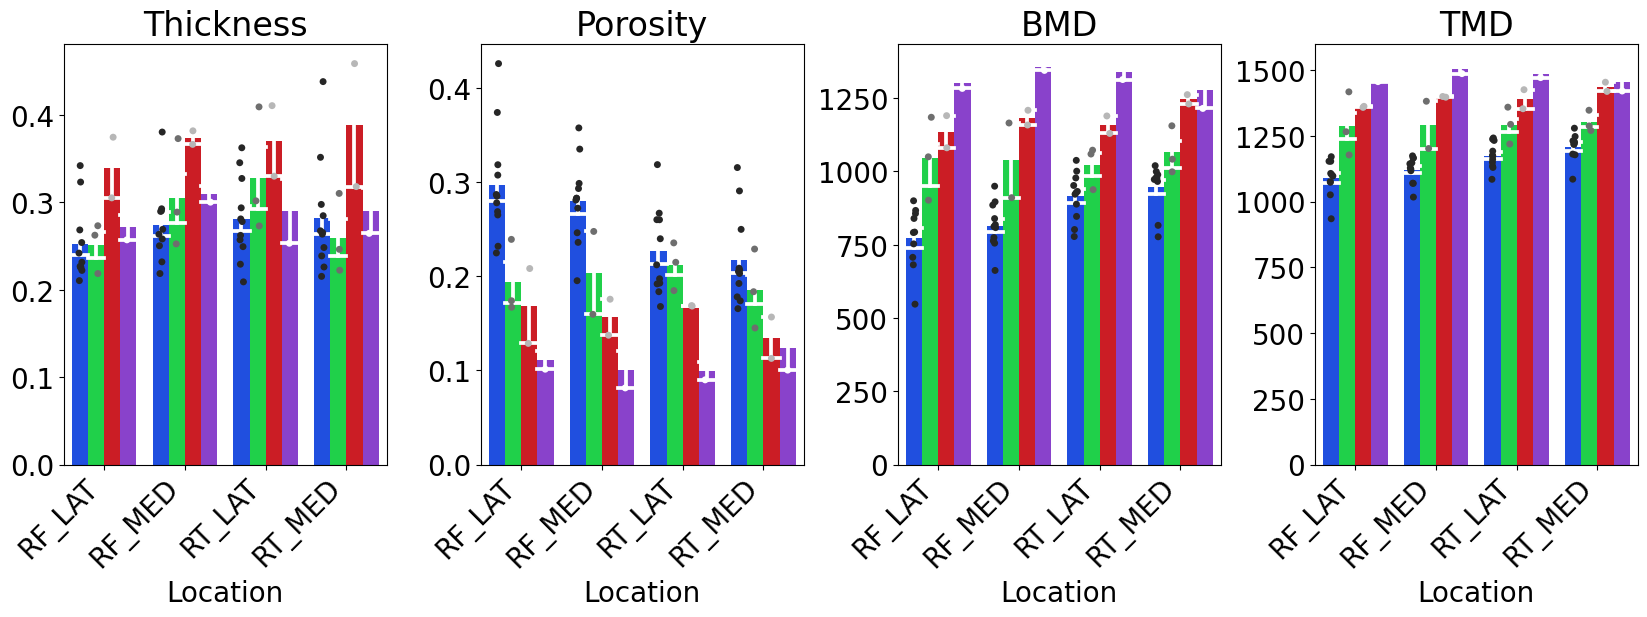

In [31]:
ITS_subplots('Thickness','Porosity','BMD','TMD')